In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

## Phase 1: Data Collection and Preparation

In [2]:
def load_data(file_path):
    """Load dataset from a CSV file."""
    return pd.read_csv(file_path)

df = load_data('https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv')

# copying data to another variable to avoid any changes to original data
df_copy = df.copy()

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [4]:
df_copy.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
def check_missing_value(dataframe):
   """check for missing value."""
   return dataframe.isna().sum()


In [6]:
check_missing_value(df_copy)

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [7]:
def check_duplicated_value(dataframe):
   """checking for duplicate values."""
   return dataframe.duplicated().sum()

In [8]:
# checking for duplicate values
check_duplicated_value(df_copy)

np.int64(0)

#### Check negative value from number of employee feature

In [9]:
# (df_copy["no_of_employees"] < 0).sum()
df_copy[df_copy["no_of_employees"] < 0] # print rows with negative no_of_employees  


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


#### make all negative value from number of employee feature to absolute

In [10]:
df_copy["no_of_employees"] = df_copy["no_of_employees"].abs()


## Phase 2: Exploratory Data Analysis (EDA)

Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable 

In [11]:
df_copy.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Let's check the count of each unique category in each of the categorical variables

In [12]:
def check_unique_category(dataframe):
  # Making a list of all catrgorical variables
  cat_col = list(dataframe.select_dtypes("object").columns)

  # Printing number of count of each unique value in each column
  for column in cat_col:
      print(dataframe[column].value_counts())
      print("*" * 50)
check_unique_category(df_copy)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
**************************************************
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

## Univariate Analysis

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined for numerical features.
    Automatically prettifies feature name for titles and labels.

    Parameters:
    ----------
    data : pd.DataFrame
        The dataset containing the feature.
    feature : str
        The numerical feature name.
    figsize : tuple, optional
        Size of the figure (default (15, 10)).
    kde : bool, optional
        Whether to show the density curve (default False).
    bins : int, optional
        Number of bins for histogram (default None).
    """
    # Prettify feature name (replace underscores with spaces and title case)
    pretty_feature = feature.replace("_", " ").title()

    # Create subplots (boxplot above, histogram below)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )

    # Add mean and median lines
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    # Labels and title using prettified feature name
    ax_box2.set(title=f"Boxplot and Histogram for {pretty_feature}")
    ax_hist2.set_xlabel(pretty_feature)
    ax_hist2.set_ylabel("Frequency")
    ax_hist2.legend()

    plt.tight_layout()
    plt.show()


### Observations on number of employees feature

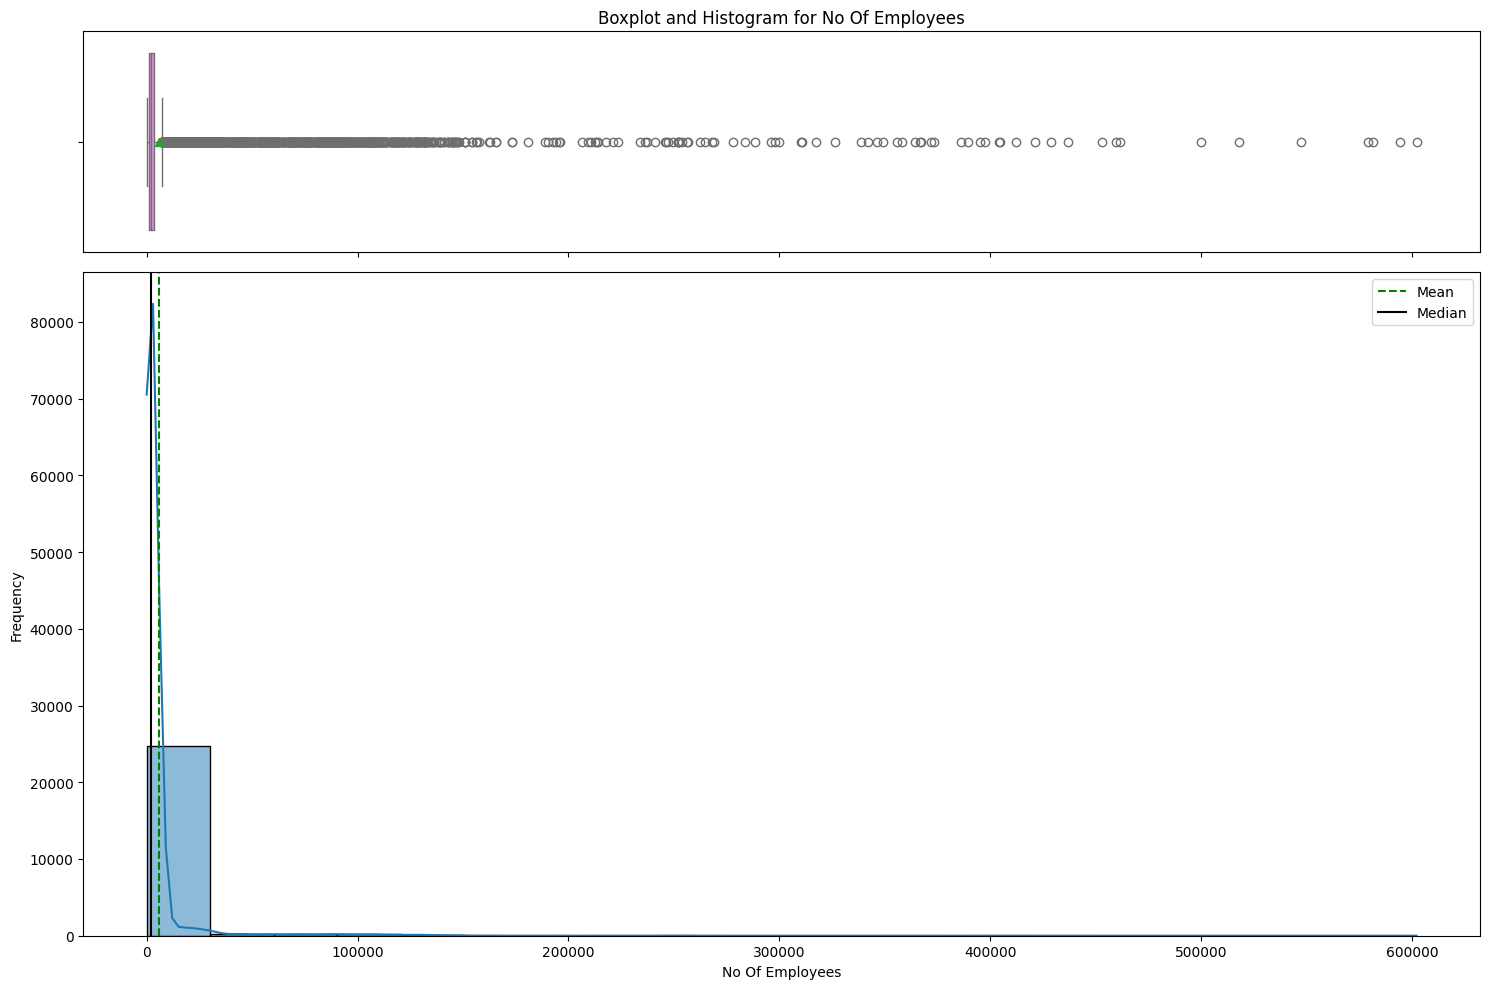

In [14]:
histogram_boxplot(df_copy, 'no_of_employees', kde=True, bins=20)

### Observations on year of establishment feature

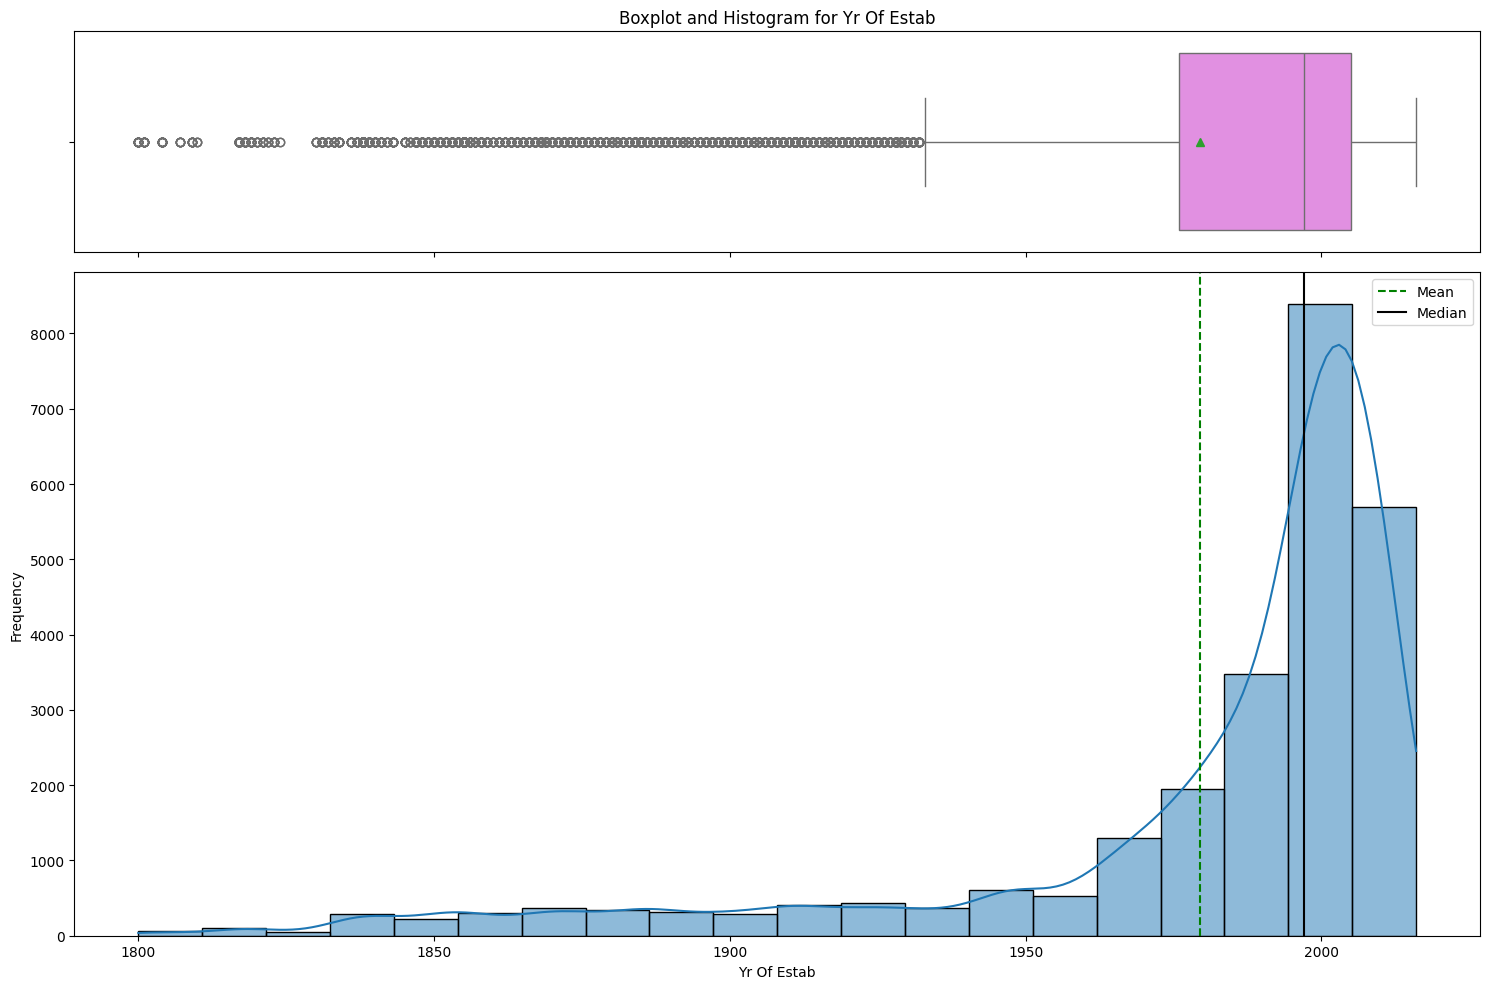

In [15]:
histogram_boxplot(df_copy, 'yr_of_estab', kde=True, bins=20)

### Observations on prevailing wage feature

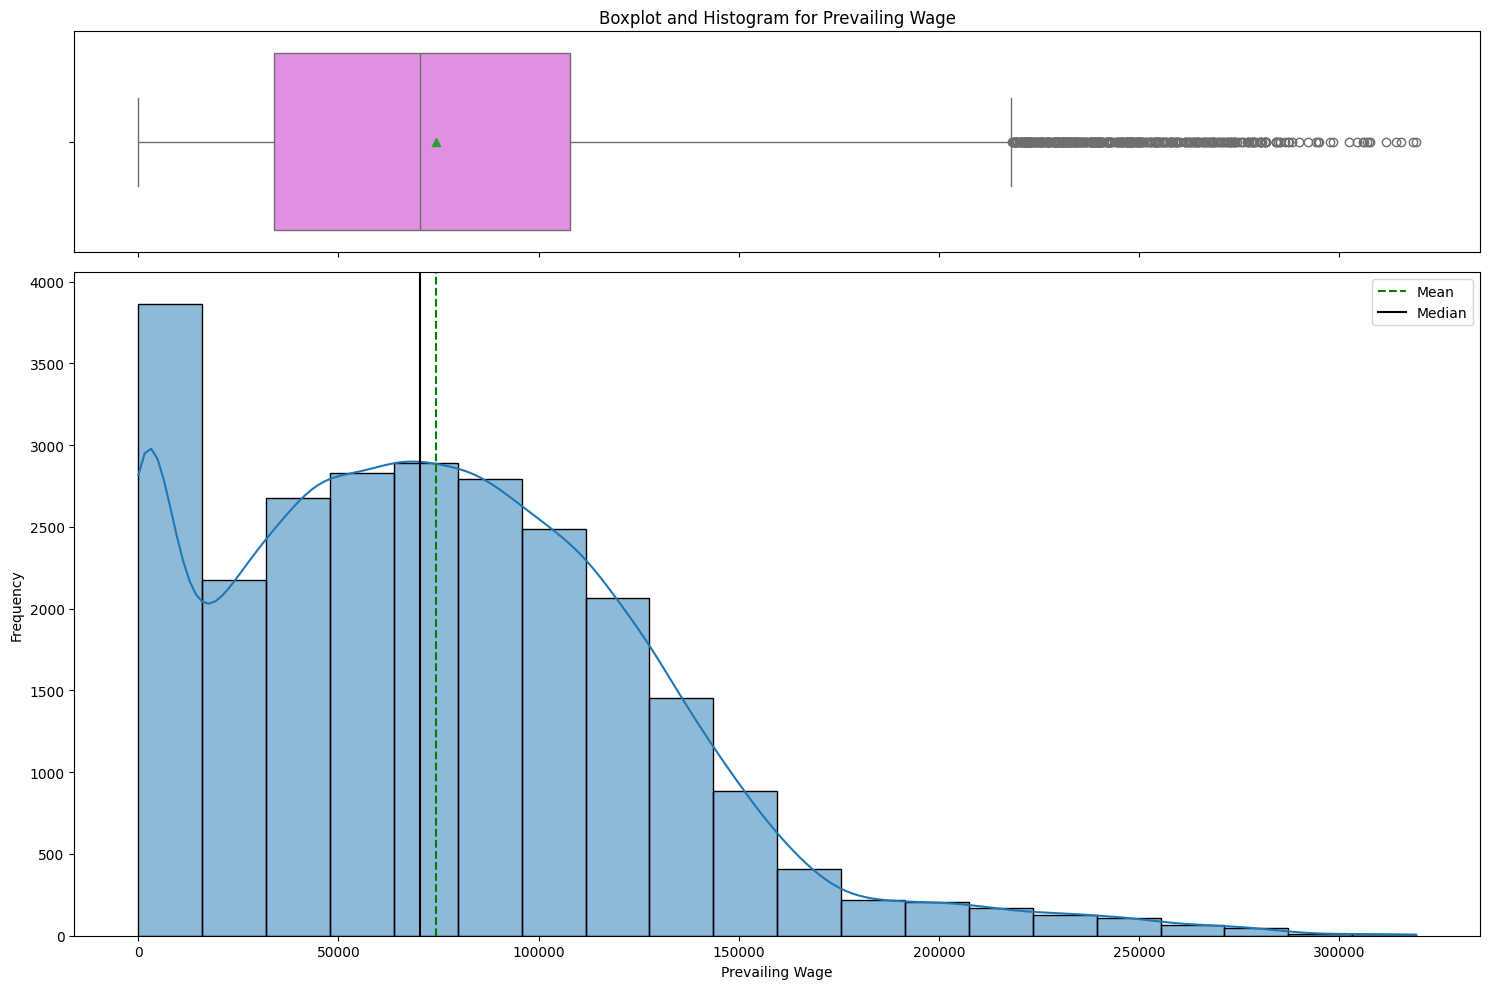

In [16]:
histogram_boxplot(df_copy, 'prevailing_wage', kde=True, bins=20)

In [17]:


def bar_boxplot(data, feature, figsize=(15, 10), color="skyblue", order=None):
    """
    Boxplot and bar chart combined for categorical features.
    Automatically prettifies feature name for labels.
    
    Parameters:
    ----------
    data : pd.DataFrame
        The dataset containing the feature.
    feature : str
        The categorical feature name.
    figsize : tuple, optional
        Size of the entire figure. Default (15, 10).
    color : str, optional
        Color for the bar plot. Default 'skyblue'.
    order : list, optional
        Custom order of categories.
    """
    # Prettify the feature name for display
    pretty_feature = feature.replace("_", " ").title()

    # Create subplots
    f, (ax_box, ax_bar) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot (summary)
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="violet", order=order
    )

    # Bar chart (frequencies)
    sns.countplot(
        data=data, x=feature, ax=ax_bar, color=color, order=order
    )

    # Add counts on bars
    for container in ax_bar.containers:
        ax_bar.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

    # Set labels and title using the prettified name
    ax_box.set(title=f"Boxplot and Countplot for {pretty_feature}")
    ax_bar.set_xlabel(pretty_feature)
    ax_bar.set_ylabel("Count")

    plt.tight_layout()
    plt.show()


### Observations on continent feature

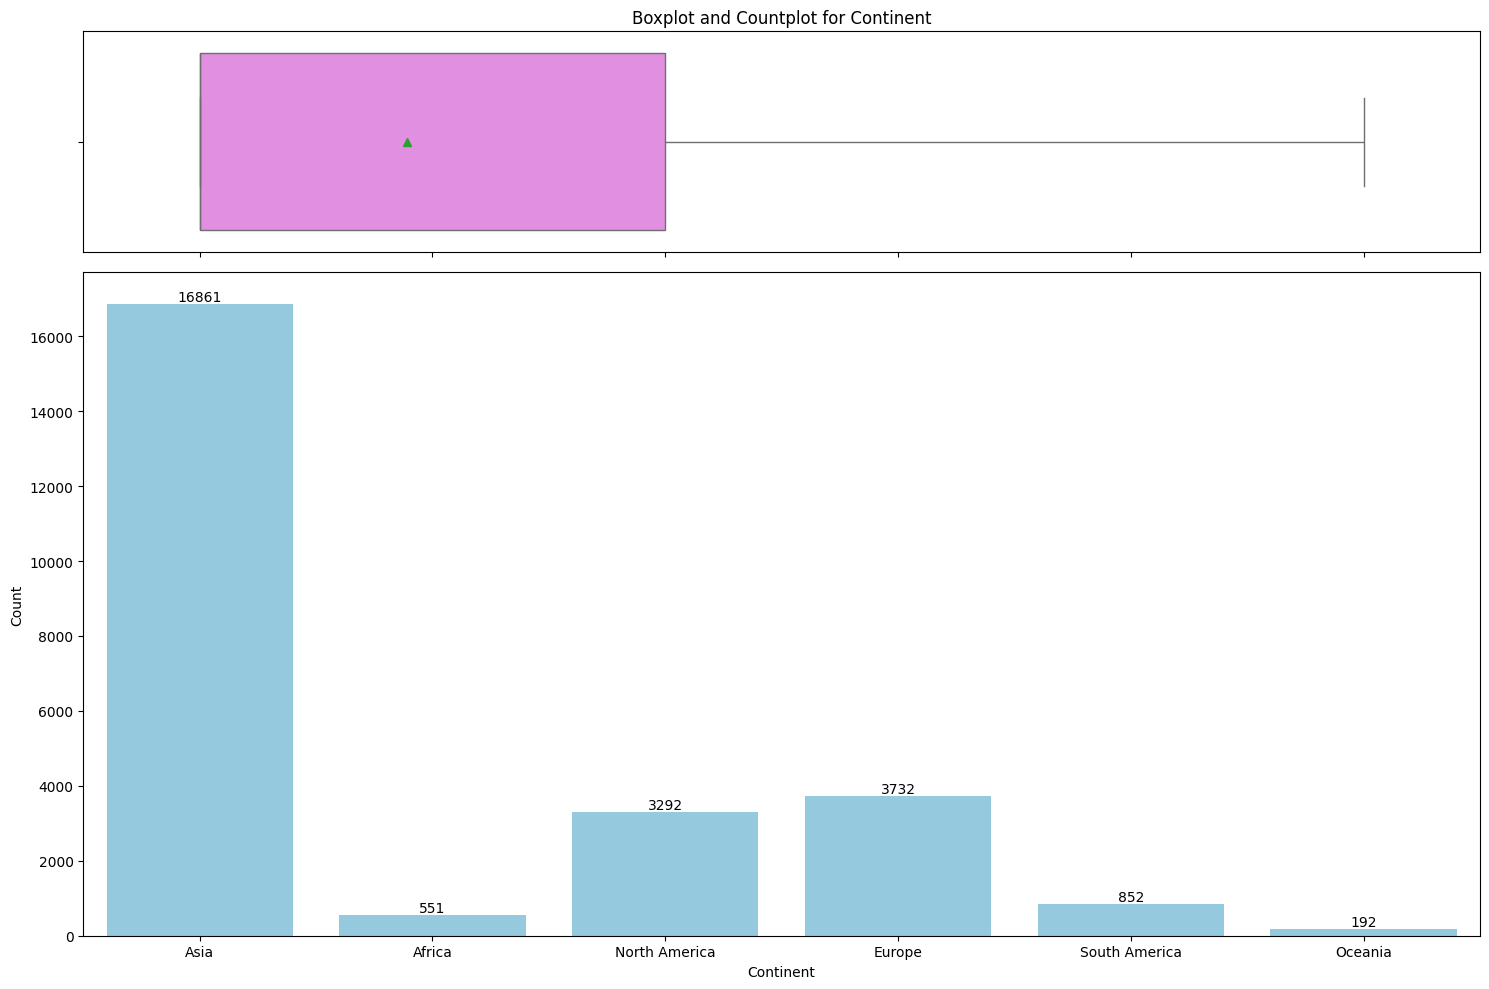

In [18]:
bar_boxplot(data=df_copy, feature="continent")

### Observations on education of employee feature

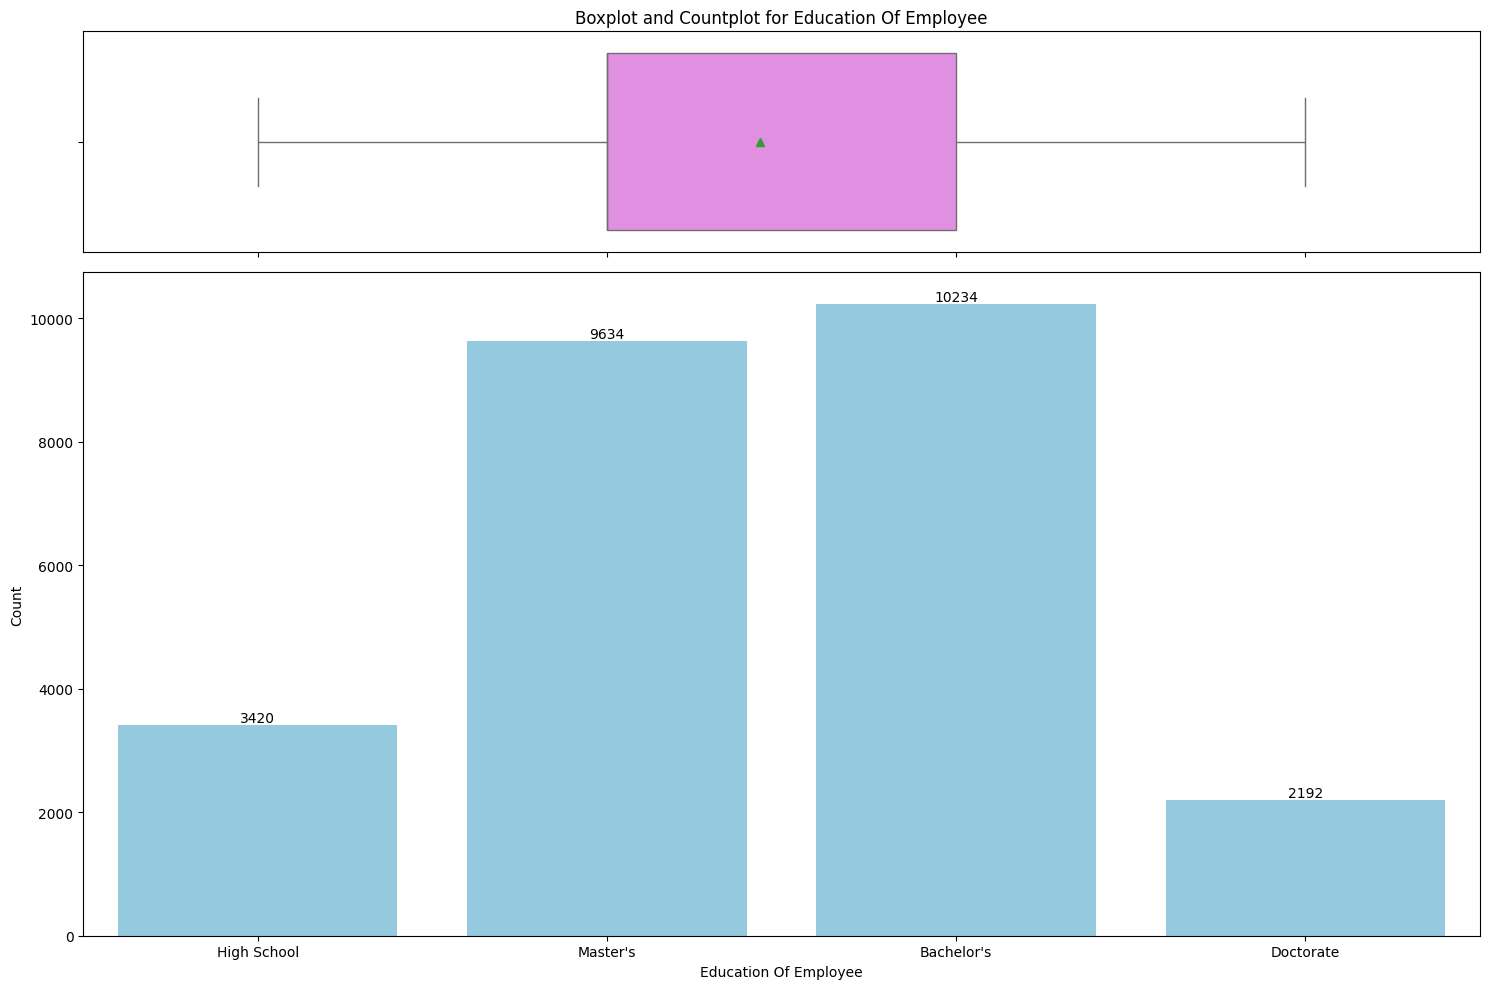

In [19]:
bar_boxplot(data=df_copy, feature="education_of_employee")

### Observations on has job experience feature

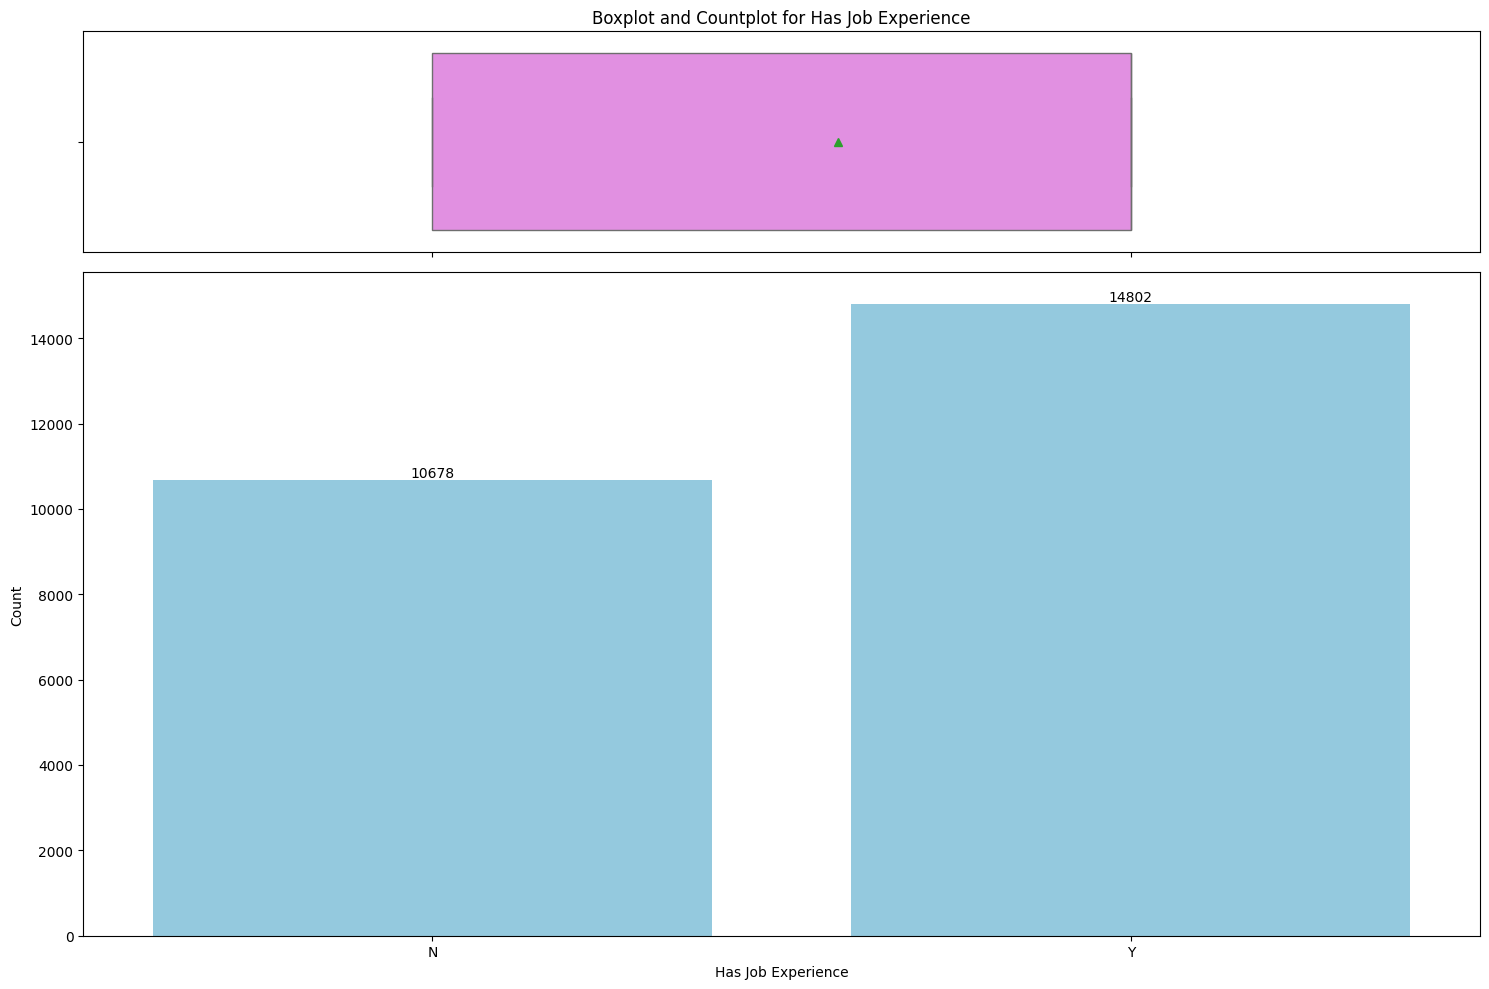

In [20]:
bar_boxplot(data=df_copy, feature="has_job_experience")

In [21]:
df_copy.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### Observations on requires job training  feature

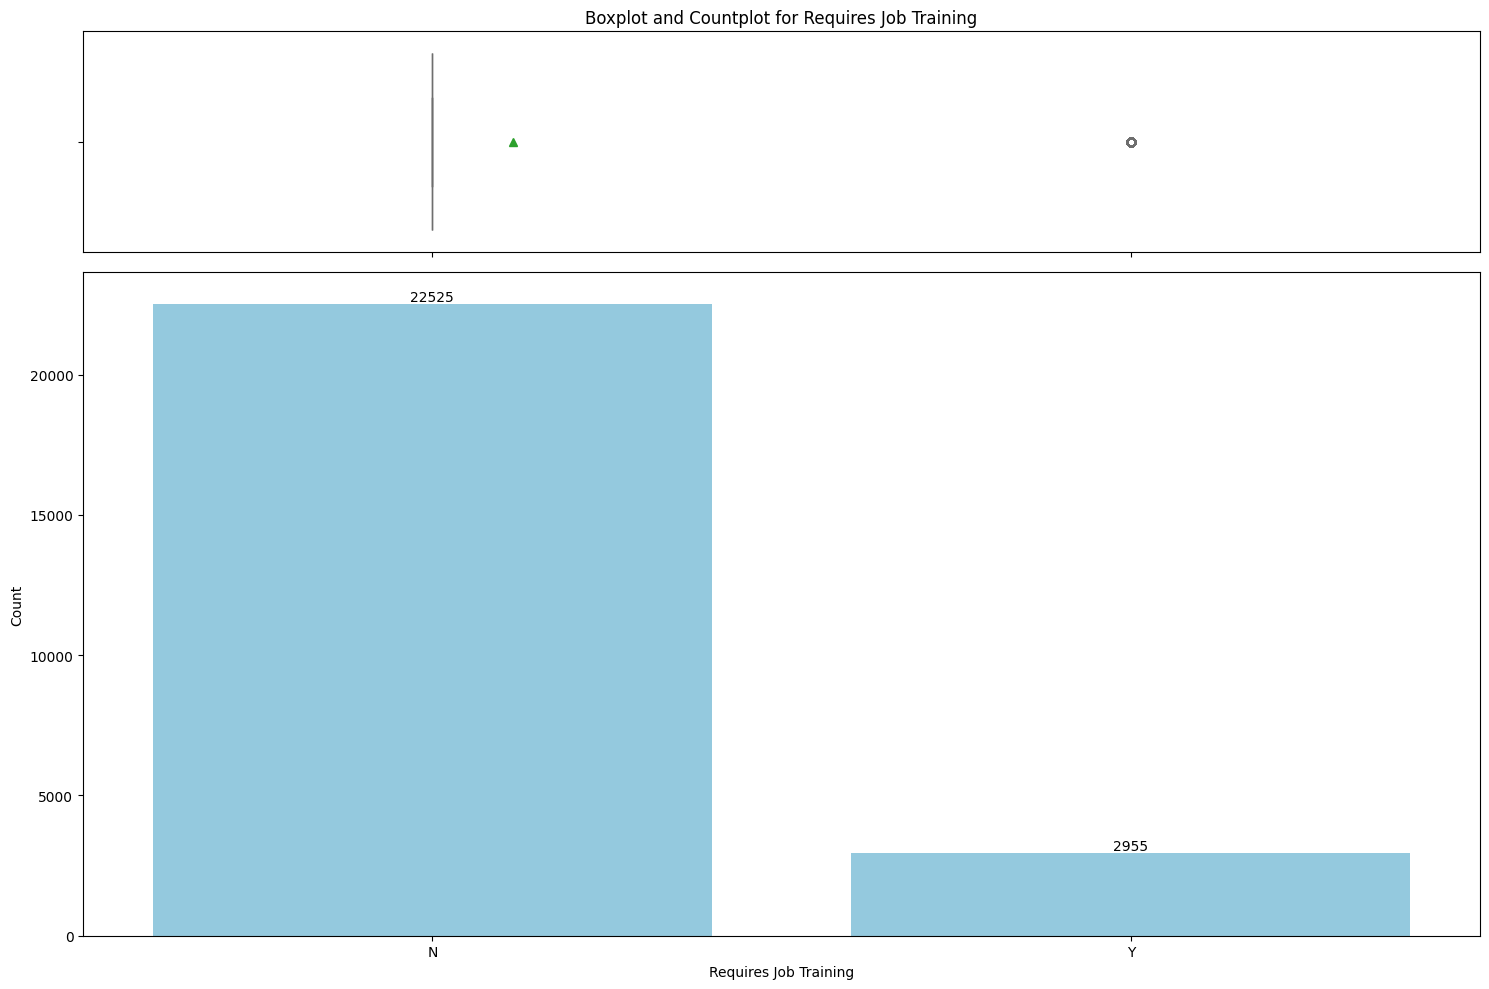

In [22]:
bar_boxplot(data=df_copy, feature="requires_job_training")

### Observations on region of employment feature

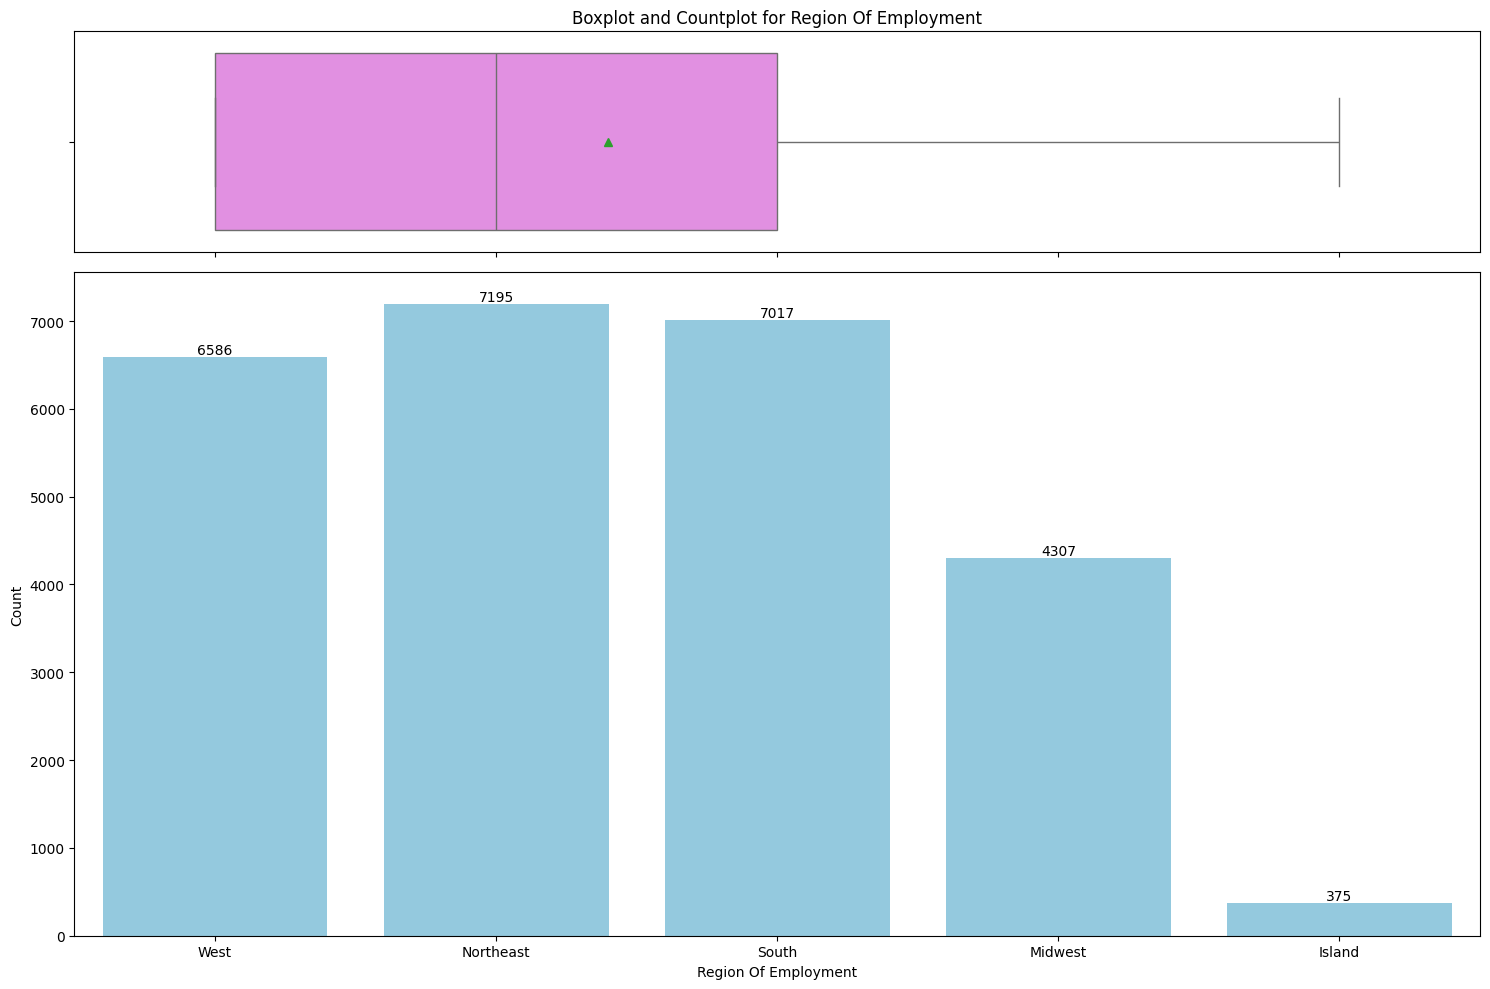

In [23]:
bar_boxplot(data=df_copy, feature="region_of_employment")

### Observations on unit of wage feature

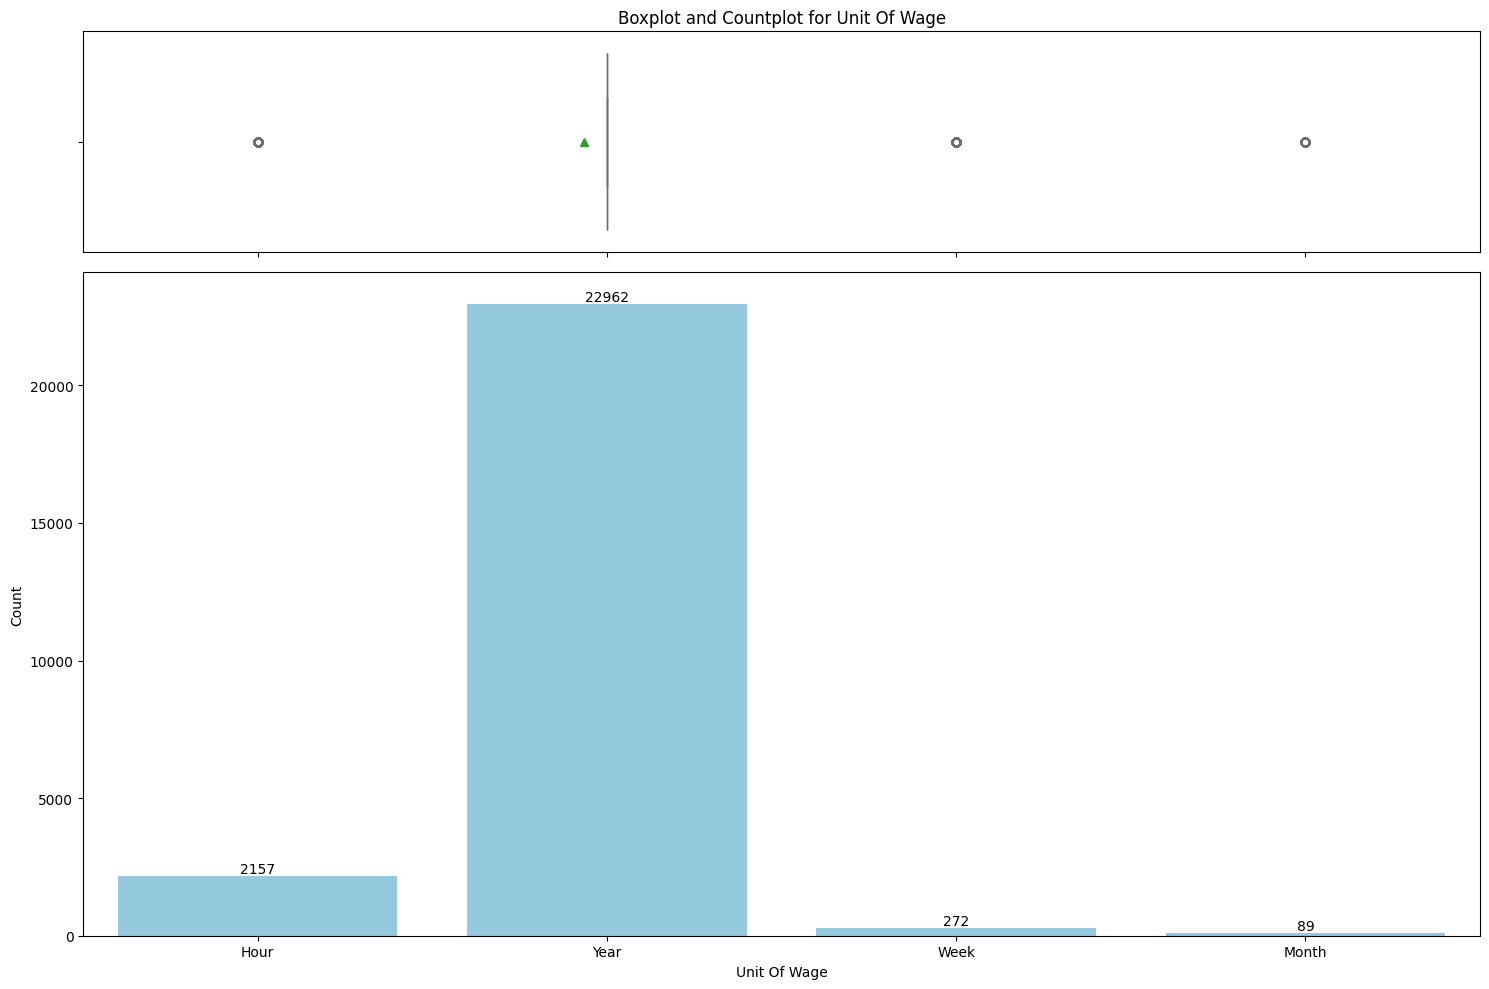

In [24]:
bar_boxplot(data=df_copy, feature="unit_of_wage")

### Observations on full time position feature

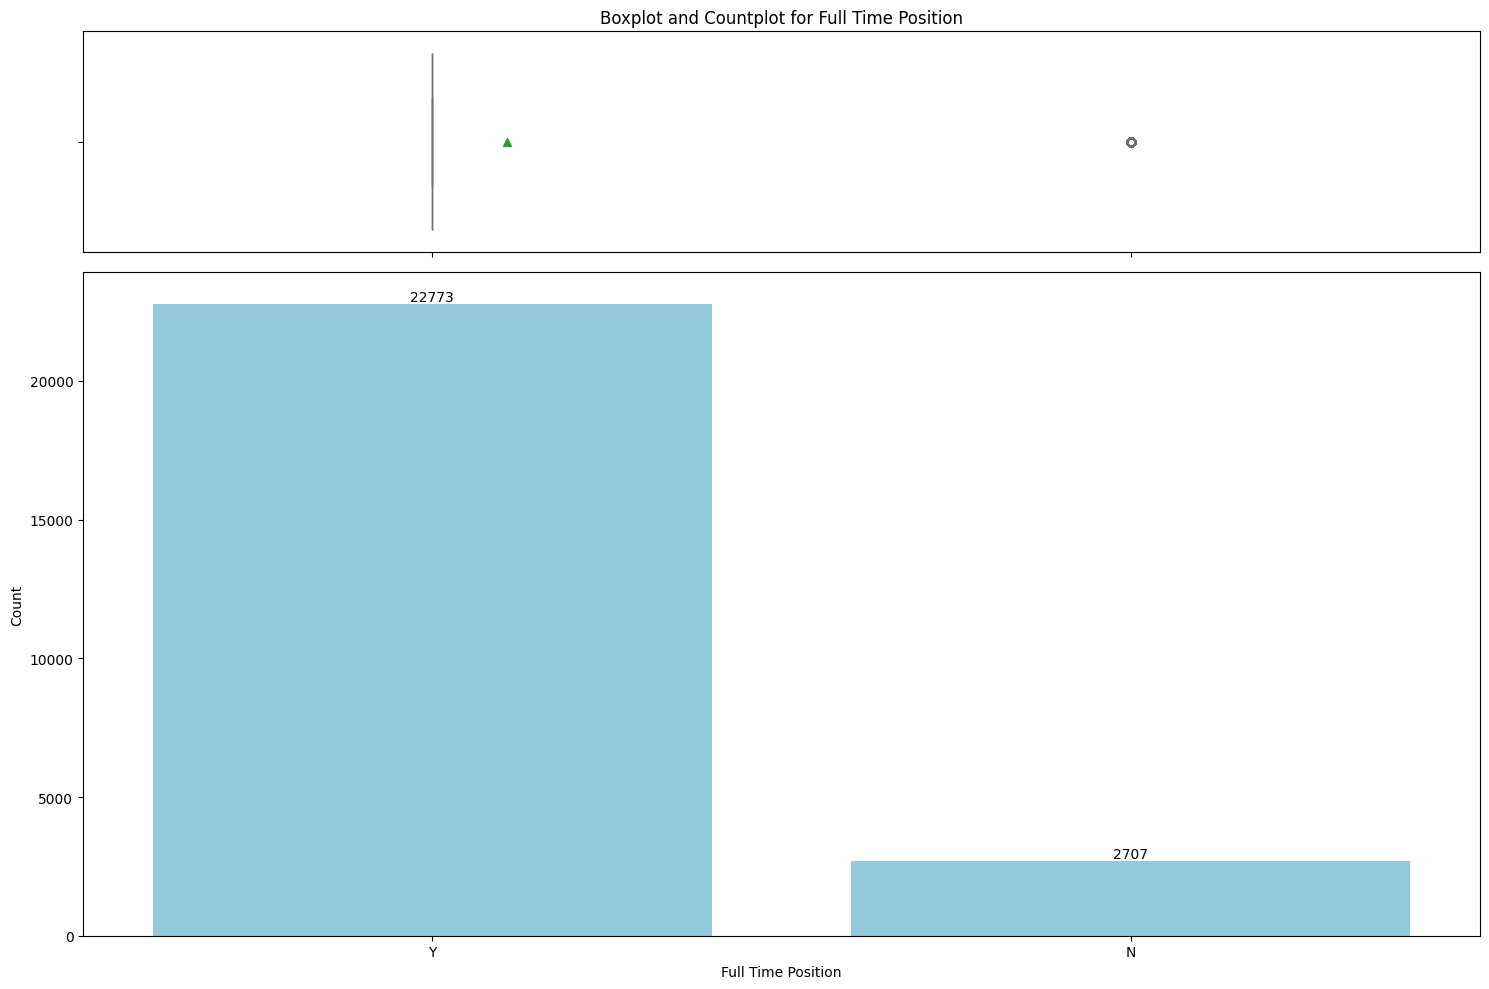

In [25]:
bar_boxplot(data=df_copy, feature="full_time_position")

### Observations on case status feature

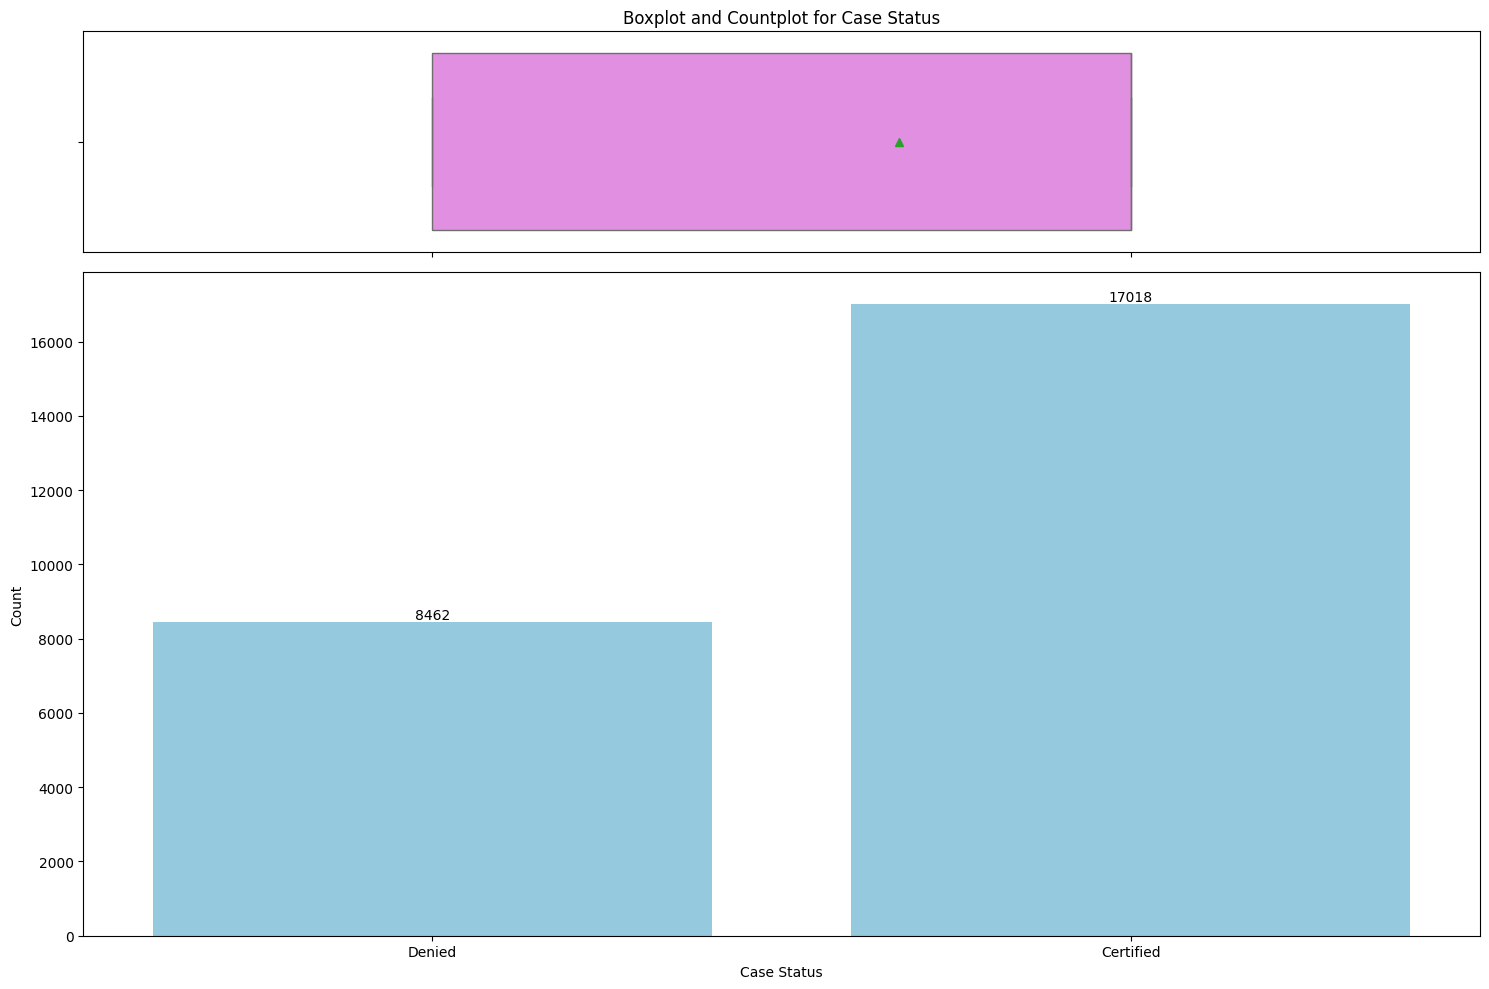

In [26]:
bar_boxplot(data=df_copy, feature="case_status")

## Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

### Bivariate Analysis

In [27]:
def heatmap_correlation(data):
    """Generate a heatmap to visualize correlations between numerical features."""  
    cols_list = data.select_dtypes(include=np.number).columns.tolist()

    plt.figure(figsize=(10, 5))
    sns.heatmap(
        data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Accent"
    )
    plt.show()

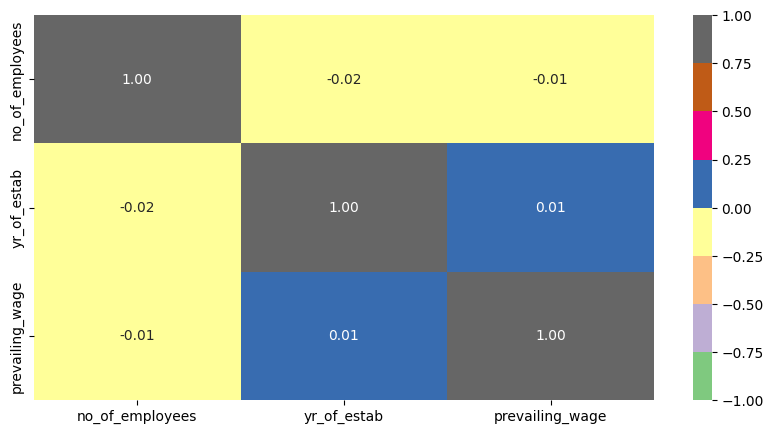

In [28]:
heatmap_correlation(df_copy)

In [29]:
def feature_target_viz(data, feature, target, figsize=(18, 6), bins=30, color="skyblue"):
    """
    Visualize relationship between a feature and a target variable 
    using Scatter Plot, Histogram, and Box Plot.

    Parameters
    ----------
    data : pd.DataFrame
        The dataset containing the feature and target.
    feature : str
        The independent variable (X).
    target : str
        The dependent variable (y).
    figsize : tuple, optional
        Size of the entire figure. Default (18, 6).
    bins : int, optional
        Number of bins for the histogram. Default 30.
    color : str, optional
        Color for plots. Default 'skyblue'.
    """
    # Prettify names for labels and titles
    pretty_feature = feature.replace("_", " ").title()
    pretty_target = target.replace("_", " ").title()

    # Create subplots (3 columns)
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    # 1️⃣ Scatter Plot: Feature vs Target
    sns.scatterplot(data=data, x=feature, y=target, ax=axes[0], color=color)
    axes[0].set_title(f"Scatter Plot: {pretty_feature} vs {pretty_target}")
    axes[0].set_xlabel(pretty_feature)
    axes[0].set_ylabel(pretty_target)

    # 2️⃣ Histogram: Distribution of Feature
    sns.histplot(data=data, x=feature, bins=bins, kde=True, ax=axes[1], color=color)
    axes[1].set_title(f"Distribution of {pretty_feature}")
    axes[1].set_xlabel(pretty_feature)
    axes[1].set_ylabel("Frequency")

    # 3️⃣ Box Plot: Feature grouped by Target
    sns.boxplot(data=data, x=target, y=feature, ax=axes[2], palette="Set2")
    axes[2].set_title(f"Box Plot of {pretty_feature} by {pretty_target}")
    axes[2].set_xlabel(pretty_target)
    axes[2].set_ylabel(pretty_feature)

    plt.tight_layout()
    plt.show()


#### Visualizing the relationships between prevailing_wage and the case status

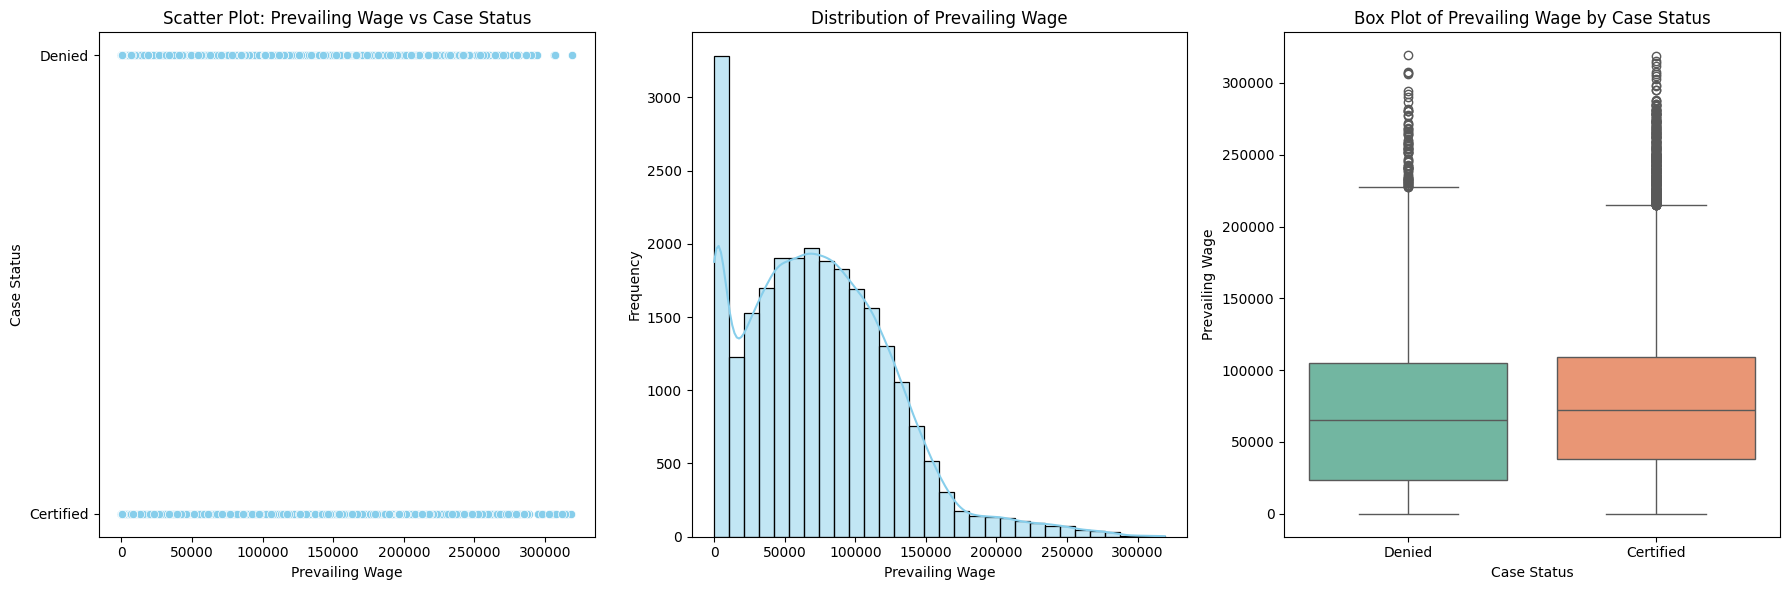

In [30]:
feature_target_viz(data=df_copy, feature="prevailing_wage", target="case_status")


#### Visualizing the relationships between yr of establishment and the case status

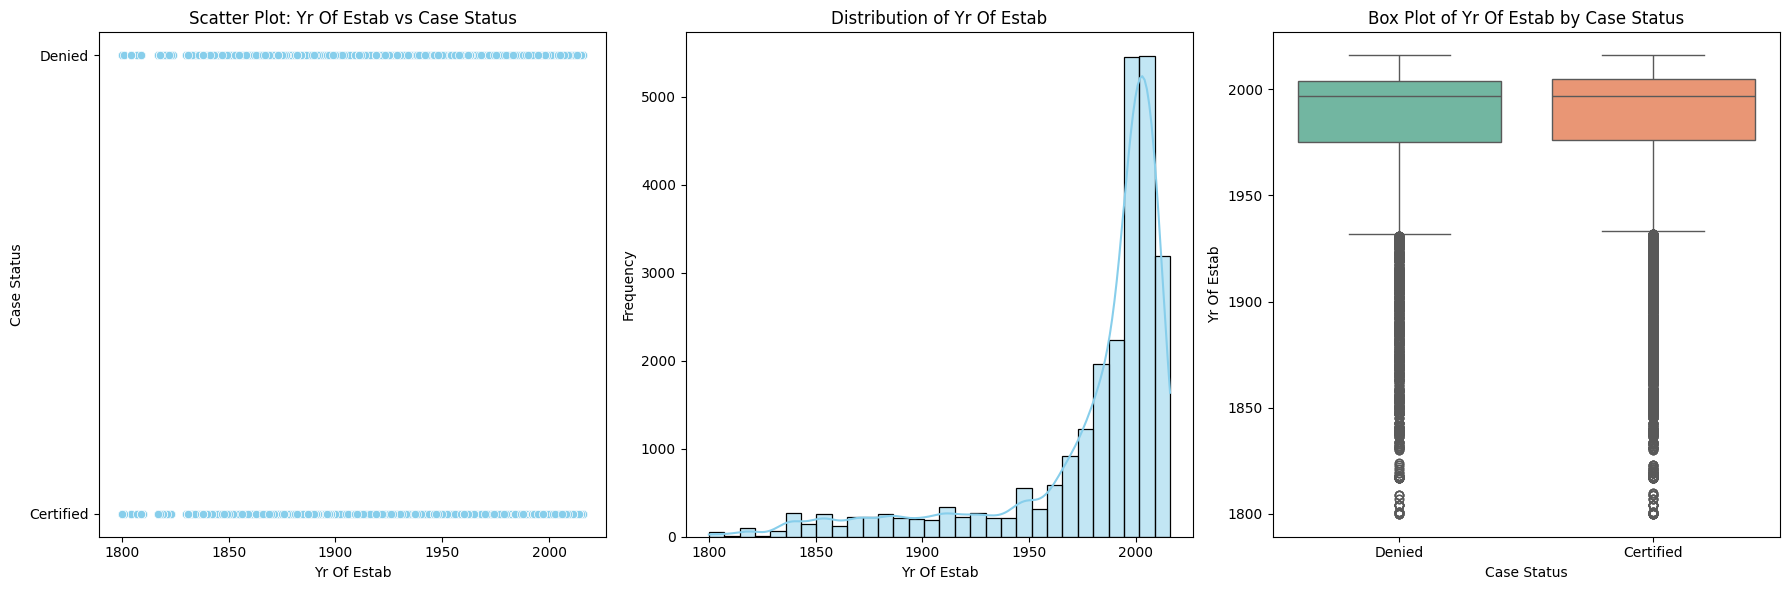

In [31]:
feature_target_viz(data=df_copy, feature="yr_of_estab", target="case_status")

#### Visualizing the relationships between no_of_employees and the case status

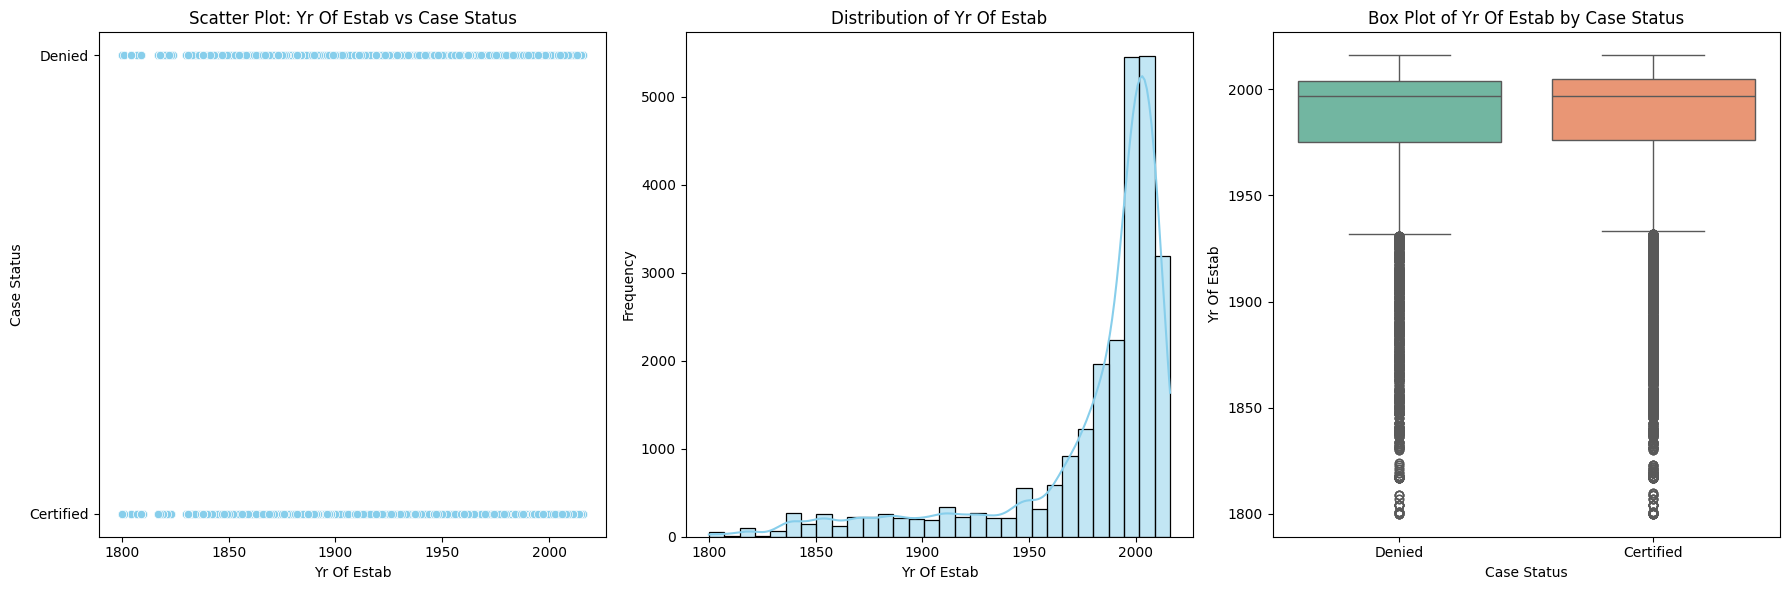

In [32]:
feature_target_viz(data=df_copy, feature="yr_of_estab", target="case_status")

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Distribution of case status across continents

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


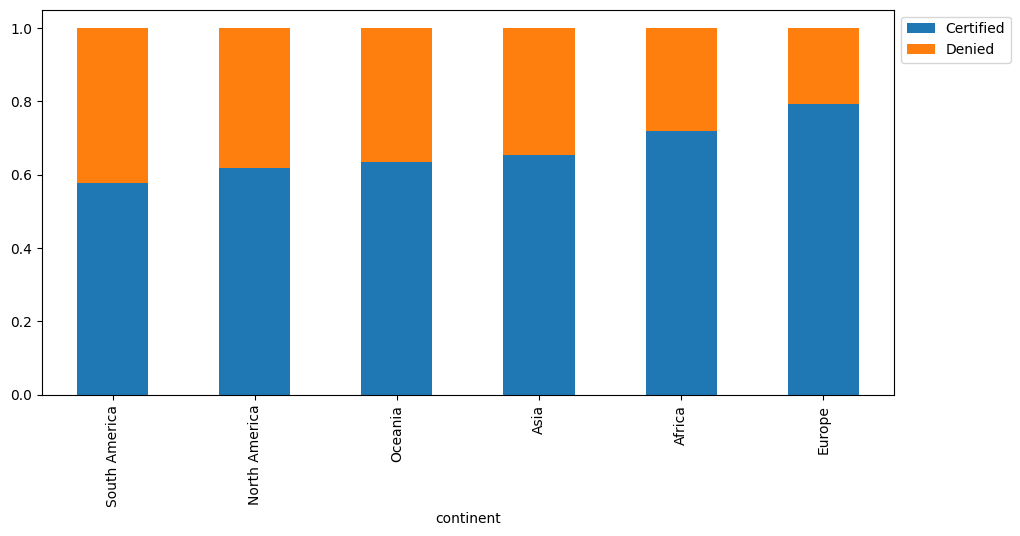

In [34]:
stacked_barplot(df_copy, predictor="continent", target="case_status")

### Distribution of case status across employee education levels

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


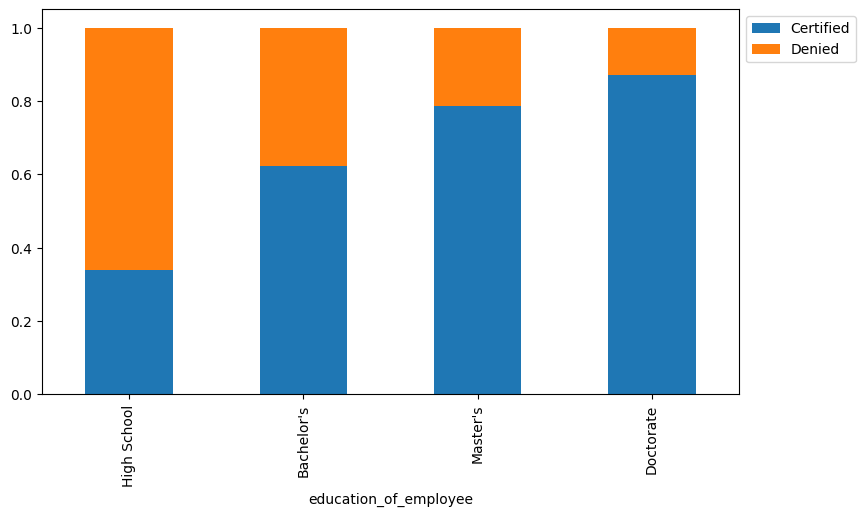

In [35]:
stacked_barplot(df_copy, predictor="education_of_employee", target="case_status")

### Distribution of case status across employee that  has job experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


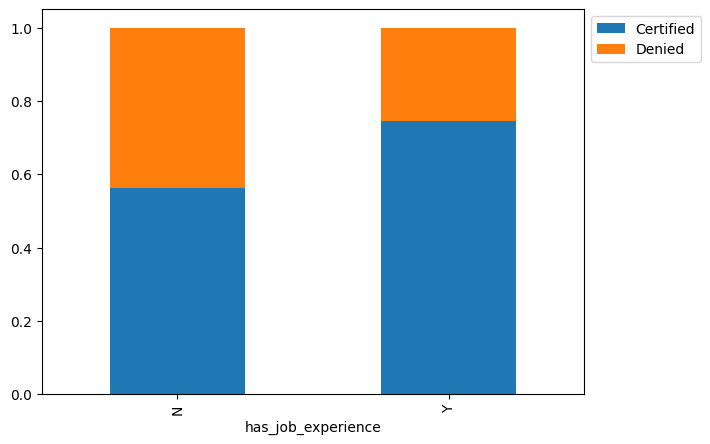

In [36]:
stacked_barplot(df_copy, predictor="has_job_experience", target="case_status")

### Distribution of case status across employee that requires job training

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


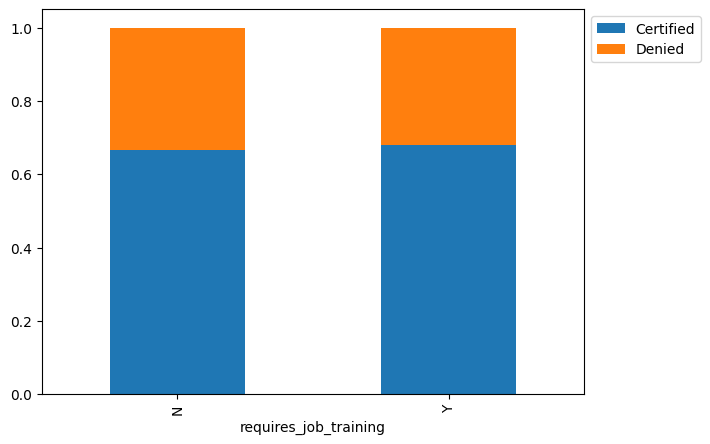

In [37]:
stacked_barplot(df_copy, predictor="requires_job_training", target="case_status")

### Distribution of case status across region of employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


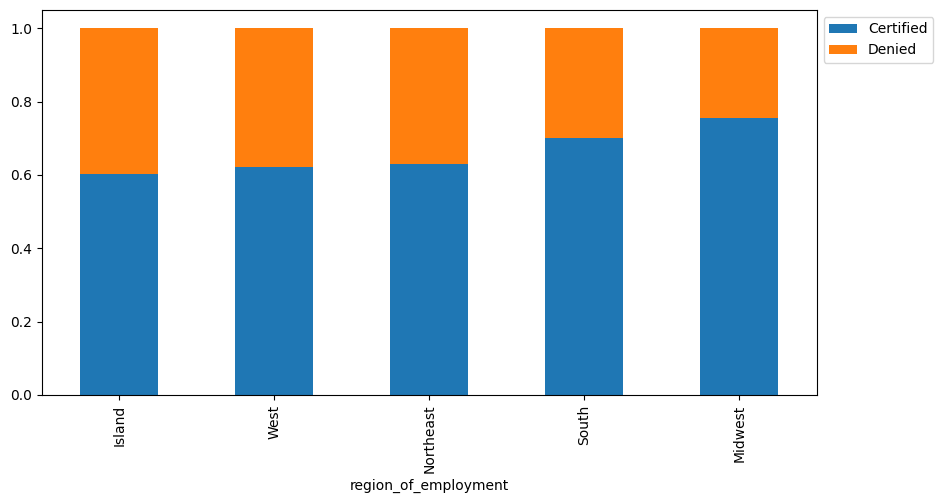

In [38]:
stacked_barplot(df_copy, predictor="region_of_employment", target="case_status")

### Distribution of case status across employee unit of wage 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


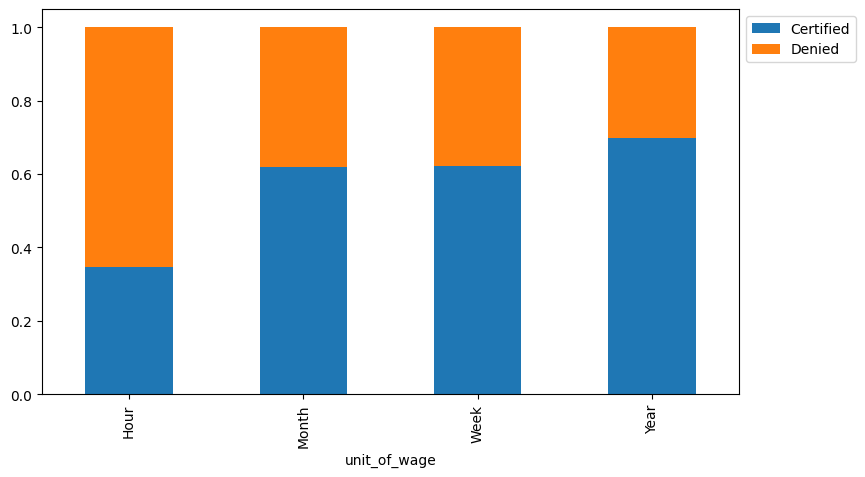

In [39]:
stacked_barplot(df_copy, predictor="unit_of_wage", target="case_status")

### Distribution of case status across employees that are full time

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


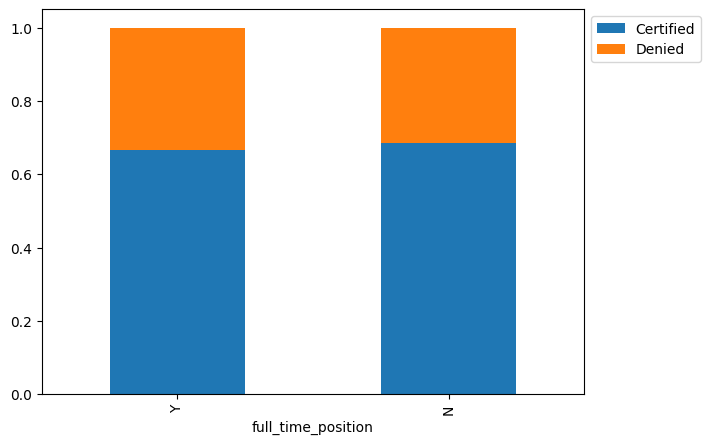

In [40]:
stacked_barplot(df_copy, predictor="full_time_position", target="case_status")

## Task 2.3: Identify and handle outliers in the dataset.

#### Outlier check

In [41]:
# -----------------------------------------------------
# Outlier Treatment using IQR Capping (Winsorization)
# ----------------------------------------------------
# Get the list of numeric columns (integer or float type)
# num_cols = [x for x in df_copy.columns if df_copy[x].dtype in ["int64", "float64"]]
# # Loop through each numeric column to cap extreme values
# for col in num_cols:
#     # Calculate the 1st quartile (Q1)
#     Q1 = df_copy[col].quantile(0.25)
#     # Calculate the 3rd quartile (Q3)
#     Q3 = df_copy[col].quantile(0.75)
#     # Compute the Interquartile Range (IQR)
#     IQR = Q3 - Q1
    
#     # Define lower and upper limits based on the 1.5*IQR rule
#     lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
#     # Cap (Winsorize) the outliers:
#     # - Any value below the lower bound is replaced with 'lower'
#     # - Any value above the upper bound is replaced with 'upper'
#     # - All other values remain unchanged
#     df_copy[col] = np.where(
#         df_copy[col] < lower, lower,
#         np.where(df_copy[col] > upper, upper, df_copy[col])
#     )


In [ ]:
# # ------------------------
# # IQR-Based Outlier Check 
# # ------------------------

# Create a new dictionary to store updated outlier counts per column
iqr_out_counts = {}
num_cols = [x for x in df_copy.columns if df_copy[x].dtype in ["int64", "float64"]]
# Loop through each numeric column again to recheck for outliers
for col in num_cols:
    # Recalculate the 1st quartile (Q1)
    Q1 = df_copy[col].quantile(0.25)
    # Recalculate the 3rd quartile (Q3)
    Q3 = df_copy[col].quantile(0.75)
    # Compute the new Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define new lower and upper bounds using the same IQR rule
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # Count how many values still fall outside the bounds (should be zero after capping)
    iqr_out_counts[col] = ((df_copy[col] < lower) | (df_copy[col] > upper)).sum()

# Convert the dictionary of new outlier counts into a pandas Series
iqr_out_counts = pd.Series(iqr_out_counts)



# If any outliers  print them; otherwise confirm that none exist
print(
    iqr_out_counts[iqr_out_counts > 0]
    if iqr_out_counts.sum() > 0
    else "No IQR outliers detected"
)

no_of_employees    1556
yr_of_estab        3260
prevailing_wage     427
dtype: int64


In [43]:
def outlier_check(data):
    """Function to check for outliers in numerical columns."""
    
    # Select numeric columns
    numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
    
    # Plot the boxplots for all numeric columns
    n_cols = 3  # number of subplots per row
    n_rows = int(np.ceil(len(numeric_columns) / n_cols))
    
    plt.figure(figsize=(5*n_cols, 5*n_rows))
    
    for i, variable in enumerate(numeric_columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=data, y=variable)
        plt.title(f'Boxplot of {variable}')
        plt.tight_layout()
    
    plt.show()

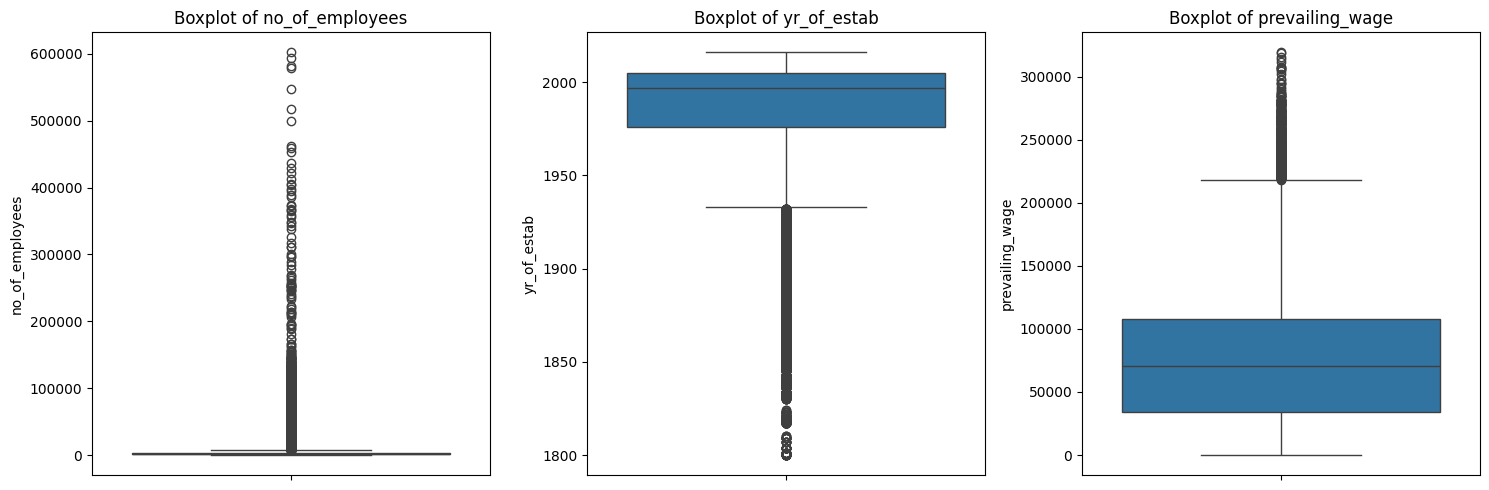

In [44]:
outlier_check(df_copy)

#### Removing Outliers

In [45]:
# def remove_outliers(data, columns):
#     """
#     Removes outliers from the specified columns of the dataframe using the IQR method.

#     Parameters:
#     data (pd.DataFrame): The dataframe to remove outliers from.
#     columns (list): List of columns to check for outliers.

#     Returns:
#     pd.DataFrame: Dataframe with outliers removed.
#     """
#     for col in columns:
#         # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)

#         # Calculate the IQR (Interquartile Range)
#         IQR = Q3 - Q1

#         # Define bounds for outliers
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Remove outliers
#         data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

#     return data

In [46]:
# # Selecting numeric columns
# numeric_columns = df_copy.select_dtypes(include=np.number).columns.tolist()

# # Remove outliers from the numeric columns
# cleaned_data = remove_outliers(df_copy, numeric_columns)

# # Print the shape of the cleaned data to check how many rows were removed
# print(f"Original data shape: {df_copy.shape}")
# print(f"Cleaned data shape: {cleaned_data.shape}")

# # Update the original dataset
# df_copy = cleaned_data
